# Police Killings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
print(police_killings.columns)
police_killings.head(5)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


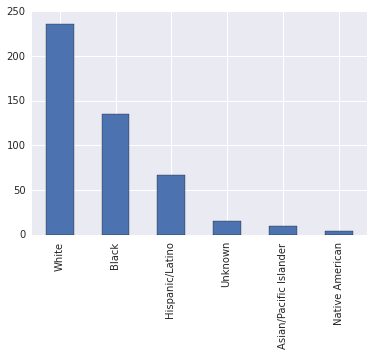

In [3]:
killings_by_race=police_killings['raceethnicity'].value_counts()
killings_by_race.plot(kind='bar')
sns.plt.show()

**The above plot shows that on the definite scale, white people are killed more by the police than black people are killed**

**However, when we take into the percent of each race from the data ..**

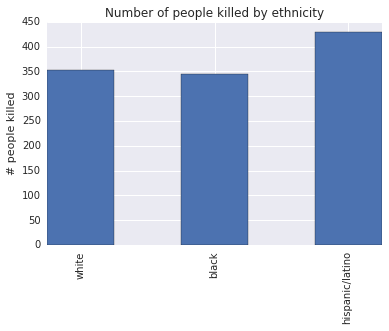

In [47]:
# Doing a comparison between black and white people
Black = police_killings[police_killings['raceethnicity']=='Black']
White = police_killings[police_killings['raceethnicity']=='White']
HLatino = police_killings[police_killings['raceethnicity']=='Hispanic/Latino']

# Convert the <share_''> columns to floats because they are objects
#  errors = 'coerce' returns NaN for errors
share_black = pd.to_numeric(Black['share_black'],errors='coerce').mean()/100
share_white = pd.to_numeric(White['share_white'],errors='coerce').mean()/100
share_hlatino = pd.to_numeric(White['share_hispanic'],errors='coerce').mean()/100

# Normalize the killing count by race %
killings_white=killings_by_race['White']/share_white
killings_black=killings_by_race['Black']/share_black
killings_hlatino=killings_by_race['Hispanic/Latino']/share_hlatino

x=[1.,2.,3.]
y=[killings_white, killings_black, killings_hlatino]
labels=['white', 'black', 'hispanic/latino']
plt.figure
plt.bar(x,y, width=0.5)
plt.xticks(np.array(x)+0.25,labels, rotation='vertical')
plt.ylabel('# people killed')
plt.title('Number of people killed by ethnicity')
plt.show()

**When normalized, the number of black and white people killed are very close to each other and that of hispanic/latino is higher**